# `PymFitter` example

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import pymfit

`PymFitter` is a (probably temporary) hackish class for running `imfit` with arbitrary models. It takes as input an instance of `Model`, which knows all the necessary info about the model. 

First, I'll run it on the same galaxy as I did in `example.ipynb`.

Start by generating a mask:

In [2]:
img_fn = '../data/test-galaxy-2.fits'
mask_fn = '../local_data/mask.fits'
mask_kws = dict(out_fn=mask_fn, thresh=1.2, kern_sig=1.0, backsize=10, 
                obj_rmin=5, grow_sig=3.0, use_hsc_mask=False)
final_mask = pymfit.make_mask(img_fn, **mask_kws)

The galaxy is centered with the image, so I'll use that as an initial guess:

In [3]:
X0, Y0 = pymfit.get_img_center(img_fn)

Build the model and use it to instantiate a `PymFitter` object:

In [4]:
model = pymfit.Model(
    funcs = 'Sersic',    # Function names
    params = None,       # Initial params that are different from default
    centers = [X0, Y0],  # guess for centers
    dcent = 30           # delta center (i.e., (X0, Y0) +/- dcent)
)
fitter = pymfit.PymFitter(model)

Run `imfit` and visualize results:

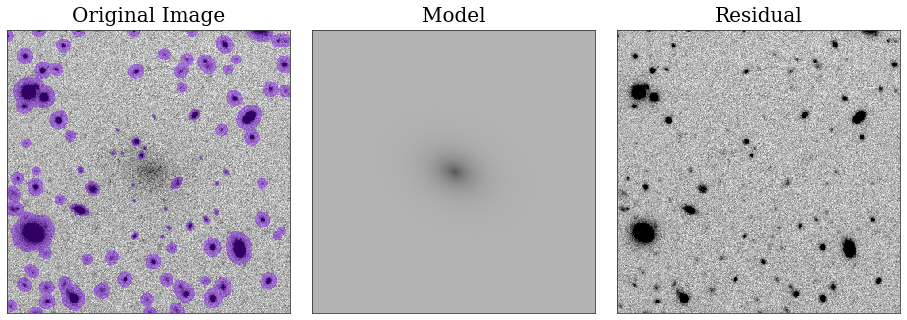

In [5]:
fitter.run(img_fn+'[1]', var_fn=img_fn+'[3]', mask_fn=mask_fn, will_viz=True) 
fitter.viz_results();

There's also a printing method for a quick summary of the results:

In [6]:
fitter.print_results()


Component  1
---------------------
Function   Sersic
X0         180.7333
Y0         178.5293
PA         67.0555
ell        0.2704
n          0.9960
I_e        0.0392
r_e        37.2357


Now, I will run add a flat sky level to the model:

In [7]:
model = pymfit.Model(
    funcs = ['Sersic', 'FlatSky'],    # use lists for multiple components
    params = [None, None],        
    centers = [[X0, Y0], [X0, Y0]],   # [[X0, Y0], None] would force the same center (irrelevant here)
    dcent = 30
)
fitter = pymfit.PymFitter(model)

fitter.run(img_fn+'[1]', var_fn=img_fn+'[3]', mask_fn=mask_fn, will_viz=True)
fitter.print_results()


Component  1
---------------------
Function   Sersic
X0         180.7398
Y0         178.491
PA         247.6920
ell        0.2661
n          1.0924
I_e        0.0348
r_e        40.7732

Component  2
---------------------
Function   FlatSky
X0         178.491
Y0         178.5
I_sky      -0.0012


Currently, I have only implemented `Sersic`, `Gaussian`, and `FlatSky` functions, which can be combined to form arbitrarily complicated multi-component models:

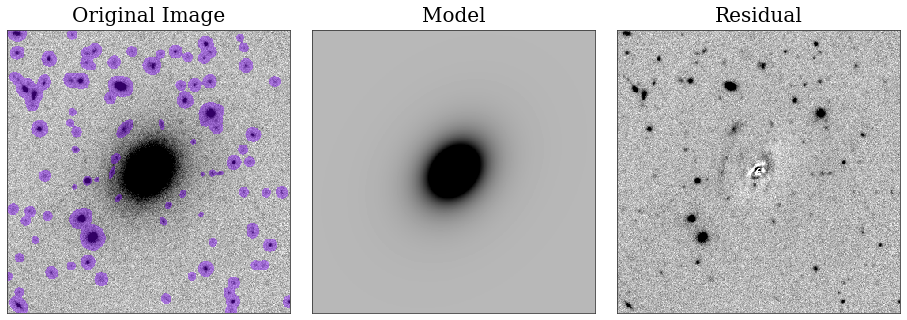

In [8]:
img_fn = '../data/test-galaxy-1.fits'
mask_fn = '../local_data/mask.fits'
mask_kws = dict(out_fn=mask_fn, thresh=1.2, kern_sig=1.0, backsize=10, 
                obj_rmin=5, grow_sig=3.0, use_hsc_mask=False)
final_mask = pymfit.make_mask(img_fn, **mask_kws)

X0, Y0 = pymfit.get_img_center(img_fn)

model = pymfit.Model(
    funcs = ['Sersic', 'Sersic', 'Gaussian', 'Sersic', 'FlatSky'],    
    params = [dict(PA=[20., 0., 360], n=[1.0, 0., 5]), None, None, None, None],        
    centers = [[X0, Y0], [X0, Y0], [X0, Y0], None, [X0, Y0]],   
    dcent = 30
)

fitter = pymfit.PymFitter(model)

fitter.run(img_fn+'[1]', var_fn=img_fn+'[3]', mask_fn=mask_fn, will_viz=True)
fitter.viz_results();

In [9]:
fitter.print_results()


Component  1
---------------------
Function   Sersic
X0         180.0489
Y0         180.3382
PA         316.4840
ell        0.1440
n          0.6115
I_e        35.3717
r_e        2.0899

Component  2
---------------------
Function   Sersic
X0         180.3382
Y0         180.246
PA         129.9030
ell        0.2769
n          0.5435
I_e        6.2107
r_e        5.7562

Component  3
---------------------
Function   Gaussian
X0         180.246
Y0         180.1292
PA         80.6451
ell        0.0000
I_0        0.0100
sigma      1.0000

Component  4
---------------------
Function   Sersic
X0         180.246
Y0         180.1292
PA         138.6690
ell        0.2225
n          1.9149
I_e        0.9689
r_e        24.6849

Component  5
---------------------
Function   FlatSky
X0         180.1292
Y0         180.6319
I_sky      -0.0051
